In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

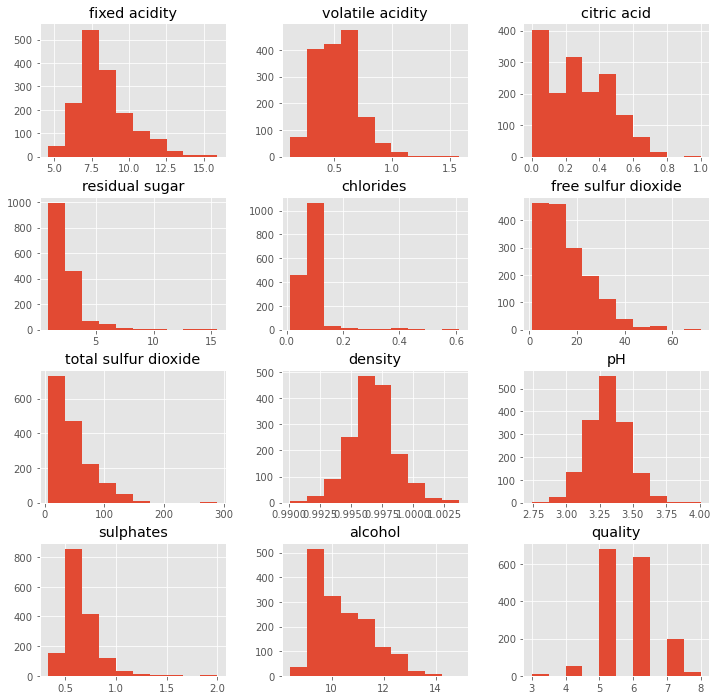

In [8]:
plt.style.use('ggplot')
pd.DataFrame.hist(df, figsize=(12,12))

# the range of the predictor variables differs greatly, Any algorithm, such as k-NN, which cares about the distance 
# between data points, may thus focus squarely and unfairly on variables with a larger range.

In [13]:
X=df.drop('quality', axis=1).values
y1=df.quality.values

np.unique(y1)

array([3, 4, 5, 6, 7, 8], dtype=int64)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

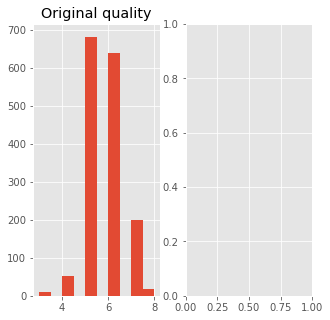

In [22]:
# split quality column to values 0 (bad quality) and 1 (good quality)  -> threshold: 5
import numexpr

y=numexpr.evaluate('(y1 <=5)')
y

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.hist(y1)
plt.title('Original quality')

plt.subplot(1,2,2)
plt.hist(y)
plt.title('aggregated target value')


In [35]:
# df['booleanquality']=[]
# s=[0 if df.quality.values<=5 else 1]
df.quality<=5

0        True
1        True
2        True
3       False
4        True
        ...  
1594     True
1595    False
1596    False
1597     True
1598    False
Name: quality, Length: 1599, dtype: bool

In [36]:
df.quality=0 if df.quality<=5 else 1

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().